In [4]:
"""
Load a model and show the steady-state distribution of the model.
"""
import sys 
sys.path.append('../')
import os
import torch 
import json
from lib.utils.misc import kl_divergence

N, M = 9, 3 # Number of underlying states, Number of walkers IN THE SUBSET OF NODES

loss = 'KL_divergence_forward'  # or 'KL_divergence_forward', 'mse', 'KL_divergence_backward
model_type = 'MultipleSteadyStateSoftmaxMarkovChain'  # or 'SteadyStateSoftmaxMarkovChain', 'MultipleSteadyStateSoftmaxMarkovChain
dataset = 'LyonSchool'  # or 'LyonSchool', 'InVS15', 'SFHH, Thiers13
"""--------------------Experiment configuration--------------------"""
NAME = f'[{dataset}][N={N}][M={M}][{loss}][{model_type}]'

log_path = os.path.join('../'
                                'experiments',
                                NAME,
                                'experiment_log.txt',
                                )

with open(log_path, 'r') as file_:
    lines = file_.readlines()
print(f'Number of lines: {len(lines)}')

Number of lines: 288


C:\Users\dalmasan\AppData\Local\Temp\ipykernel_26348\1644370602.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_df_dict[model_type] = pd.concat([model_df_dict[model_type], pd.DataFrame({'N': N, 'kl_div': kl_div}, index=[0])], ignore_index=True)
C:\Users\dalmasan\AppData\Local\Temp\ipykernel_26348\1644370602.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_df_dict[model_type] = pd.concat([model_df_dict[model_type], pd.DataFrame({'N': N, 'kl_div': kl_div}, index=[0])], ignore_

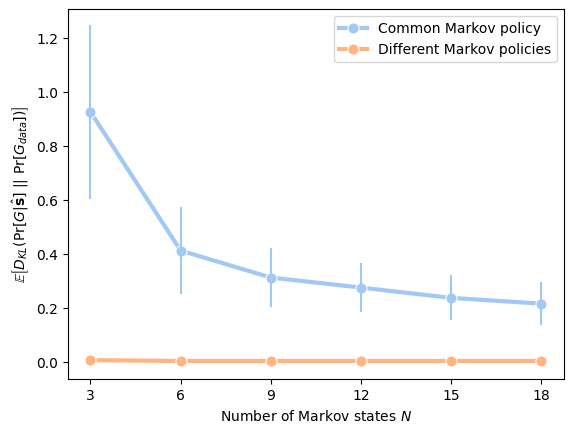

In [31]:
import sys, os
sys.path.append('../')

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lib.utils.misc import kl_divergence

colors = sns.color_palette('pastel')

loss = 'KL_divergence_forward'  # or 'KL_divergence_forward', 'mse', 'KL_divergence_backward
dataset = 'LyonSchool'  # or 'LyonSchool', 'InVS15', 'SFHH, Thiers13
M = 3
num_walker_subsets = 30
N_range = [3, 6, 9, 12, 15, 18]
kl_div_dict = {
    'SteadyStateSoftmaxMarkovChain': {N: [] for N in N_range},
    'MultipleSteadyStateSoftmaxMarkovChain': {N: [] for N in N_range}
}

model_label_dict = {
    'SteadyStateSoftmaxMarkovChain': 'Common Markov policy',
    'MultipleSteadyStateSoftmaxMarkovChain': 'Different Markov policies'
}

model_df_dict = {
    'SteadyStateSoftmaxMarkovChain': pd.DataFrame(columns=['N', 'kl_div']),
    'MultipleSteadyStateSoftmaxMarkovChain': pd.DataFrame(columns=['N', 'kl_div'])
}

fig, ax1 = plt.subplots(1, 1, sharex=True)

for model_id, model_type in enumerate(['SteadyStateSoftmaxMarkovChain', 'MultipleSteadyStateSoftmaxMarkovChain']):
    for N in N_range:
        for walker_subset in range(num_walker_subsets):
            NAME = f'[{dataset}][N={N}][M={M}][{loss}][{model_type}][subset_id={walker_subset}]'

            log_path = os.path.join('../'
                                            'experiments',
                                            NAME,
                                            'experiment_log.txt',
                                            )

            with open(log_path, 'r') as file_:
                lines = file_.readlines()

            for line in lines:
                if 'INFO Best model by kl div [kl div/loss]: ' in line:
                    kl_div = float(line.split('INFO Best model by kl div [kl div/loss]: ')[1].strip()[1:].split('/')[0])
                    if kl_div < 0:
                        kl_div = 0  # floating point machine accuracy error
                    break
            kl_div_dict[model_type][N].append(kl_div)

            model_df_dict[model_type] = pd.concat([model_df_dict[model_type], pd.DataFrame({'N': N, 'kl_div': kl_div}, index=[0])], ignore_index=True)        

    sns.lineplot(data=model_df_dict[model_type], 
                 x="N", 
                 y="kl_div", 
                 ax=ax1, 
                 label=model_label_dict[model_type], 
                 marker='o', 
                 markersize=8, 
                 linewidth=3, 
                 color=colors[model_id],
                 err_style="bars",
                 errorbar=("se", 2),
                 alpha = 1
                 )

ax1.set_xlabel(r'Number of Markov states $N$')
ax1.set_ylabel(r'$\mathbb{E}\left[ D_{KL}(\Pr[G| \hat{\bf{s}}]\  ||\  \Pr[G_{data}]) \right]$')
ax1.set_xticks(N_range)
ax1.legend(loc='upper right', fontsize=10)
